In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [5]:
import IPython.display as ipd
from matplotlib import pyplot as plt

import torch

from ttsxai.utils.utils import read_ljs_metadata
from ttsxai.utils import plot_utils
from ttsxai.interfaces.tts_interface import TTSInterface, get_text2mel, get_mel2wave

In [8]:
jupyter_utils.unregister_always_reload()

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_dir = '/nas/users/dahye/kw/tts/ttsxai/data/LJSpeech/metadata.csv'
text_dict = read_ljs_metadata(mode='train')

text2mel = get_text2mel('tacotron2', device)
mel2wave = get_mel2wave('waveglow', device)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/nas/users/dahye/kw/tts/ttsxai/src/waveglow/glow.py:74: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
  W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
/nas/users/dahye/kw/tts/ttsxai/src/tacotron2/stft.py:67: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)


In [7]:
tts = TTSInterface(
    device=device,
    text2mel=text2mel,
    mel2wave=mel2wave 
).to(device)

# text = text_dict['LJ023-0111']
# text = text_dict['LJ037-0224']
# text = 'My name is Kyowoon.'
text = 'in being comparatively modern.'
# text = 'Nor even when found guilty and his liberty forfeited did his privileges cease. The law appointed a suitable punishment for the offense;'
# text = 'Why don\'t we go out and get some nice sasimi?'
output_dict = tts.forward(text)
wave = output_dict['wave']

ipd.Audio(wave, rate=tts.sampling_rate)

(80, 164)


/nas/users/dahye/kw/tts/ttsxai/src/tacotron2/audio_processing.py:50: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  win_sq = librosa_util.pad_center(win_sq, n_fft)


In [9]:
output_dict.keys()

dict_keys(['wave', 'mel', 'text', 'phone', 'phonesymbols', 'token', 'duration', 'alignment', 'activations'])

In [5]:
output_dict['text']

'in being comparatively modern.'

In [7]:
output_dict['phone']

'{IH0 N} {B IY1 IH0 NG} {K AH0 M P AE1 R AH0 T IH0 V L IY2} {M AA1 D ER0 N}.'

In [6]:
output_dict['token']

array([108, 119,  11,  88, 113, 108, 120,  11, 116,  73, 118, 129,  70,
       130,  73, 133, 108, 143, 117, 114,  11, 118,  66,  90,  97, 119,
         7])

In [12]:
from ttsxai.interfaces.prosody_interface import ProsodyInterface
prosody = ProsodyInterface(tts.sampling_rate, tts.hop_length)
out = prosody(wave)

/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:163: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:267: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sampling_rate, filter_length, n_mel_channels, mel_fmin, mel_fmax


(0.0, 1.9388662131519274)

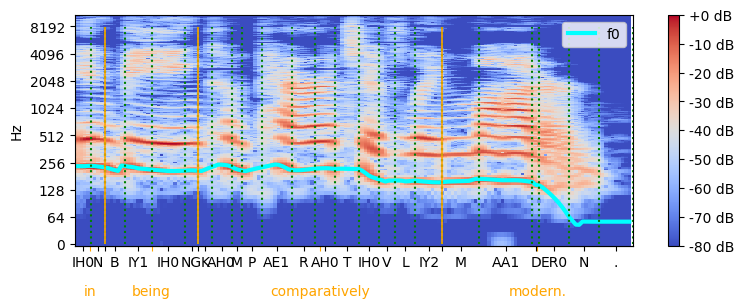

In [9]:
wave = output_dict['wave']
phone = output_dict['phone']
phonesymbols = output_dict['phonesymbols']
token = output_dict['token']
duration = output_dict['duration']
sampling_rate = tts.sampling_rate
hop_length = tts.hop_length

from ttsxai.interfaces.prosody_interface import ProsodyInterface
prosody = ProsodyInterface(sampling_rate, hop_length)
# prosody_dict = prosody(wave, duration)
prosody_dict = prosody(wave)
pitch = prosody_dict['pitch']

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(wave, sr=sampling_rate, hop_length=hop_length, spec_type='spectrogram', ax=ax,
    f0=pitch)
plot_utils.plot_phonesymbols(text, phonesymbols, duration, hop_length, sampling_rate, ax)
# debug
ax.set_xlim([0, len(wave) / sampling_rate])

In [9]:
import time
from scipy.io import wavfile

st = time.time()

wavfile.write(
    # os.path.join(out_dir, speaker, "{}.wav".format(base_name)),
    './text.wav',
    tts.sampling_rate,
    wave
)

print(time.time() - st)

0.01333165168762207


In [29]:
mel = output_dict['mel']
np.max(mel), np.min(mel)

(1.1414144, -11.031201)

In [36]:
np.isnan(mel)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
mel = output_dict['mel']
np.max(mel), np.min(mel)

(1.4316232, -11.000674)

In [19]:
np.min(mel)

-11.074509

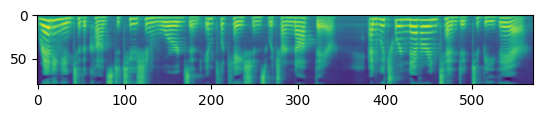

In [11]:
mel = output_dict['mel']
plt.imshow(mel)

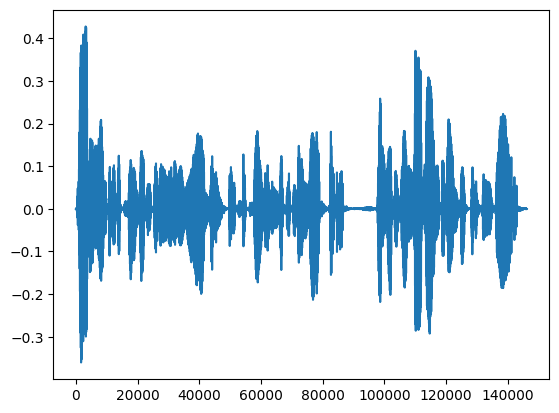

In [12]:
plt.plot(wave)

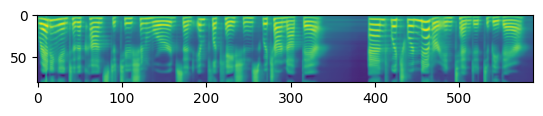

In [8]:
mel = output_dict['mel']
plt.imshow(mel)

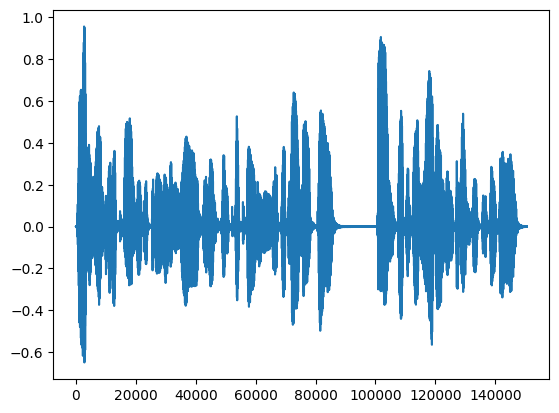

In [15]:
plt.plot(wave)

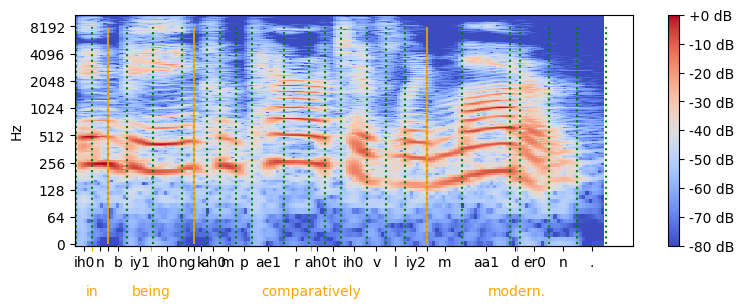

In [5]:
wave = output_dict['wave']
phone = output_dict['phone']
phonesymbols = output_dict['phonesymbols']
token = output_dict['token']
duration = output_dict['duration']
sampling_rate = tts.sampling_rate
hop_length = tts.hop_length

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(wave, sr=sampling_rate, hop_length=hop_length, spec_type='spectrogram', ax=ax)
plot_utils.plot_phonesymbols(text, phonesymbols, duration, hop_length, sampling_rate, ax)

In [6]:
from ttsxai.interfaces.preprocessor_interface import Parselmouth

mouse = Parselmouth(fs=tts.sampling_rate, hop_length=tts.hop_length)

ModuleNotFoundError: No module named 'ttsxai.interfaces.preprocessor_interface'

NameError: name 'wave' is not defined

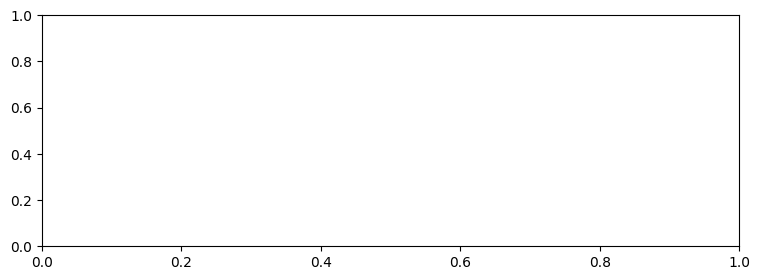

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_audio(wave, sr=tts.sampling_rate, ax=ax)

In [31]:
mouse.hop_length

256

In [14]:
output_dict['mel'].shape

(80, 168)

In [16]:
168 * 256

43008

In [15]:
wave.shape

(43008,)

In [31]:
import time

In [46]:
len(wave)

42752

In [48]:
42752 / 256

167.0

In [49]:
output_dict['mel'].shape

(80, 167)

In [ ]:
from ttsxai.pitch_calculator import PitchCalculatorWrapper

In [57]:
f0

In [60]:
f0

tensor([  0.0000,   0.0000,   0.0000, 251.7718, 252.4625, 252.9027, 253.0623,
        253.1857, 253.3514, 252.4545, 250.0295, 245.1477, 237.4216, 228.3716,
        221.0167, 219.8416, 244.7467, 244.9972, 235.9248, 232.7101, 223.2224,
        219.9882, 211.7799, 209.5913, 206.4724, 203.4975, 201.1903, 199.6818,
        202.4921, 202.4508, 202.1634, 201.6159, 200.8993, 200.3307, 200.3610,
        201.2016, 201.3073, 200.8223, 200.9056,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000, 233.0658, 230.7375, 226.8702, 220.2100, 212.8665,
        207.8995, 203.7518, 199.9291,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000, 248.8154, 251.1426, 250.1322,
        246.0984, 240.2645, 236.6380, 235.2446, 234.7341, 234.4065, 234.6732,
        235.3039, 235.3270, 235.4793, 236.4438, 236.9530, 236.5694, 234.9958,
        232.6095, 230.6355, 230.5803, 233.8509, 235.2338, 235.1222,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000, 219.1863, 209.78

In [108]:
wave.shape

(42752,)

0.009237289428710938
0.009857177734375


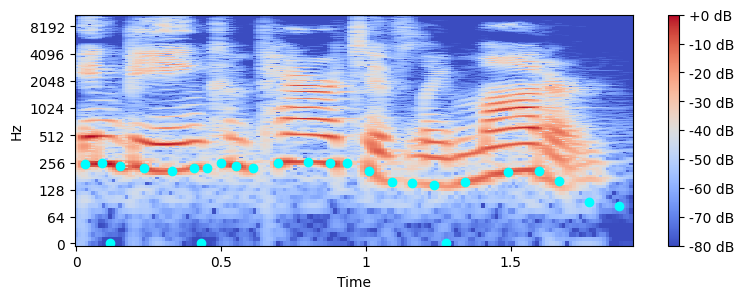

In [8]:
import time

mouse = Parselmouth(fs=tts.sampling_rate, hop_length=tts.hop_length)
st = time.time()
f0 = mouse._calculate_f0(torch.tensor(wave))
f0 = mouse._adjust_num_frames(f0, output_dict['mel'].shape[1])
print(time.time() - st)

pc = PitchCalculatorWrapper(tts.sampling_rate, tts.hop_length)
pc.to(device)
st = time.time()
f0 = pc(wave)
print(time.time() - st)

f1 = pc(wave, level='phone', duration=duration)

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(wave, sr=tts.sampling_rate, hop_length=tts.hop_length,
    spec_type='spectrogram', ax=ax)


def compute_cumulative_sums(duration):
    out = [0]
    for d in duration:
        out.append(d + out[-1])
    return out

def compute_centers(cumulative_sums):
    centers = []
    for index, _ in enumerate(cumulative_sums):
        if index + 1 < len(cumulative_sums):
            centers.append((cumulative_sums[index] + cumulative_sums[index + 1]) / 2)
    return centers

duration_time = duration * hop_length / sampling_rate
duration_splits = compute_cumulative_sums(duration_time)
phone_xticks = compute_centers(duration_splits)
ax.scatter(phone_xticks, f1, color='cyan')

In [64]:
from ttsxai.interfaces.prosody_interface import ProsodyInterface
prosody = ProsodyInterface(sampling_rate, hop_length)
out = prosody(wave)

/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:163: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:267: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  super(TacotronSTFT, self).__init__()


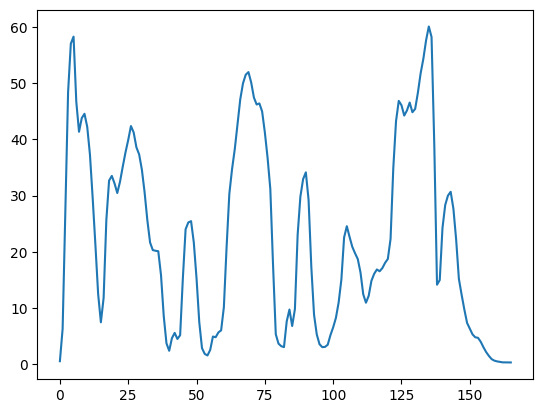

In [65]:
plt.plot(out['energy'])

In [9]:
from ttsxai.energy_calculator import EnergyCalculatorWrapper
ec = EnergyCalculatorWrapper(sampling_rate, hop_length)

/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:149: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:253: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sampling_rate, filter_length, n_mel_channels, mel_fmin, mel_fmax


In [ ]:
len()

In [18]:
len(f0)

166

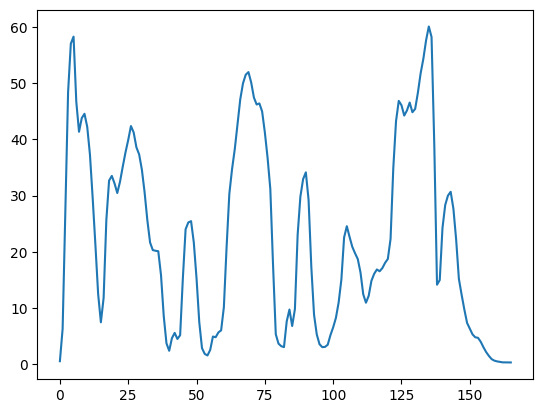

In [25]:
plt.plot(energy)

In [33]:
ec = EnergyCalculatorWrapper(sampling_rate, hop_length)
st = time.time()
energy = ec(wave)
print(time.time() - st)
len(energy)

0.004114627838134766


/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:163: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:267: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  super(TacotronSTFT, self).__init__()


166

In [117]:
import audio as Audio

ModuleNotFoundError: No module named 'audio'

In [112]:
hop_length / sampling_rate

0.011609977324263039

In [95]:
len(duration)

27

In [98]:
phonesymbols

['ih0',
 'n',
 ' ',
 'b',
 'iy1',
 'ih0',
 'ng',
 ' ',
 'k',
 'ah0',
 'm',
 'p',
 'ae1',
 'r',
 'ah0',
 't',
 'ih0',
 'v',
 'l',
 'iy2',
 ' ',
 'm',
 'aa1',
 'd',
 'er0',
 'n',
 '.']

In [94]:
duration

array([ 5,  4,  0,  7,  8,  7,  4,  0,  4,  6,  3,  6, 10,  9,  5,  5,  8,
        5,  7,  8,  0, 12, 15,  2, 10,  9, 10])

In [93]:
f1

array([251.90994263, 253.12556076,   0.        , 236.32616752,
       227.87008858, 202.5640455 , 200.80170822,   0.        ,
       201.0591774 , 219.66572952, 225.93921916, 206.76673211,
       237.50126902, 235.78566996, 235.51431885, 233.0845459 ,
       220.44415951, 175.03106689, 165.44338117, 157.8265686 ,
         0.        , 163.99185562, 202.58036601, 197.95590973,
       144.66763802,  84.19559479,  83.9358902 ])

In [72]:
f0

array([  0.      ,   0.      ,   0.      , 251.7718  , 252.4625  ,
       252.90274 , 253.06235 , 253.18571 , 253.35144 , 252.45445 ,
       250.02953 , 245.14774 , 237.42155 , 228.37164 , 221.01671 ,
       219.84155 , 244.74672 , 244.99724 , 235.9248  , 232.71013 ,
       223.22243 , 219.98816 , 211.77994 , 209.5913  , 206.47241 ,
       203.49747 , 201.19028 , 199.68181 , 202.49214 , 202.45078 ,
       202.16344 , 201.61586 , 200.89928 , 200.33067 , 200.36102 ,
       201.20155 , 201.30725 , 200.82231 , 200.9056  ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      , 233.06583 ,
       230.73749 , 226.8702  , 220.20998 , 212.8665  , 207.89948 ,
       203.7518  , 199.92906 ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
       248.81535 , 251.14261 , 250.13222 , 246.0984  , 240.26447 ,
       236.63795 , 235.24457 , 234.73413 , 234.40651 , 234.67319 ,
       235.3039  , 235.32703 , 235.4793  , 236.44377 , 236.953

In [43]:
output_dict['mel'].shape, sum(output_dict['duration'])

((80, 167), 167)

(168,)
0.06006264686584473


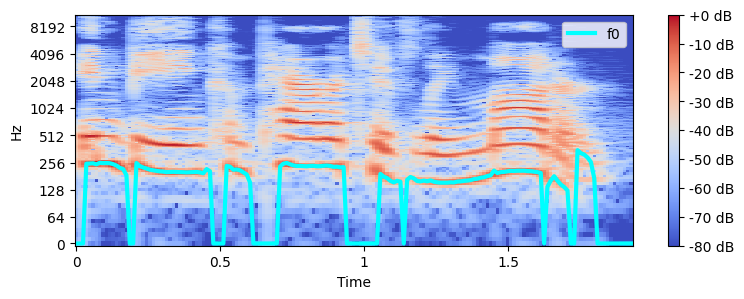

In [44]:
import time
import numpy as np
import pyworld as pw
# Compute fundamental frequency
st = time.time()
pitch, t = pw.dio(
    wave.astype(np.float64),
    tts.sampling_rate,
    frame_period=tts.hop_length / tts.sampling_rate * 1000,
)
pitch = pw.stonemask(wave.astype(np.float64), pitch, t, tts.sampling_rate)
print(pitch.shape)
pitch = pitch[: sum(output_dict['duration'])]
print(time.time() - st)

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(wave[:-1], sr=tts.sampling_rate, hop_length=tts.hop_length,
    spec_type='spectrogram', ax=ax, f0=pitch)

In [ ]:
pi